# Perturbation Implementation Comparison

We computed NLO phase shifts _many_ different ways. It would be nice to show in an Appendix that these methods all agree.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import roots_legendre
from tqdm import tqdm

import mu2

import constants as const
from interaction import potential
from counterterm import local_LO_counterterm
from mottmassey import mm_potential

gr = 4/3
h = 3

plt.style.use('science')

In [2]:
lo_rg_flow = np.loadtxt('rgflow_local_lo_a0_fix_hp_n_14_coord_ir_corrected.txt')
nlo_rg_flow = np.loadtxt('rgflow_local_nlo_a0_B6_fix_coord_hp_n_14_coord_ir_corrected.txt')

ell = 0

In [3]:
nlo_rg_flow.shape

(79, 3)

In [4]:
rmesh = mu2.Mesh(0, 10*const.BETA4, 2000)

index = -20
Ri, c0, c2 = nlo_rg_flow[index, :]
qmax = 20*2/Ri
qmesh = mu2.Mesh(0, qmax, 300)
x = mu2.LocalCounterterm(local_LO_counterterm, local_LO_counterterm, rmesh, qmesh, Ri, ell)
sys = mu2.System(mu2.Interaction(potential, x, rmesh, scheme='local'), const.MU, ell)

In [5]:
dwba = np.loadtxt('phase_shifts_nlo_pert1_wide_dense_hp_n_14_true_coord_ir_corrected.txt', dtype=np.complex128)

In [6]:
deltas_dwba = dwba[:, 1:]
deltas_dwba = deltas_dwba[:, index]

In [7]:
Ri, const.BETA4/Ri

(0.5803368089423772, 56.36363636363637)

In [8]:
# ks = np.linspace(10/const.BETA4, 100/const.BETA4, 50)
ks = dwba[:, 0].real

## König vs LongYang

Are the König and LongYang implementations consistent with one another?

In [9]:
qmax

68.92549185859359

In [10]:
ks[-1]

3.0571790743731024

In [11]:
c0, c2

(7.298986690499862, -176.84694764741394)

In [12]:
v0 = sys.v_tilde + sys.interaction.counterterm.gen(c0, 0)

In [13]:
pert_k = np.array(
    [mu2.scatter.t_on_shell_pert1(k, v0, sys.interaction.counterterm.gen(0, k**2/(2*const.MU)*c2),
         sys.q, sys.wq, sys.qmax, 2*sys.mu) for k in ks]
)

In [14]:
pert_ly = np.array(
    [mu2.scatter.t_on_shell_pert1a(k, v0, sys.interaction.counterterm.gen(0, k**2/(2*const.MU)*c2),
         sys.q, sys.wq, sys.qmax, 2*sys.mu) for k in ks]
)

In [15]:
factor = -sys.mu * np.pi * ks

In [16]:
t_k = pert_k * factor
delta_delta_k = -0.5j * (np.exp())
# deltas_k = np.arctan(t_k / (1 + 1j*t_k))

t_ly = pert_ly * factor
deltas_ly = np.arctan(t_ly / (1 + 1j*t_ly))

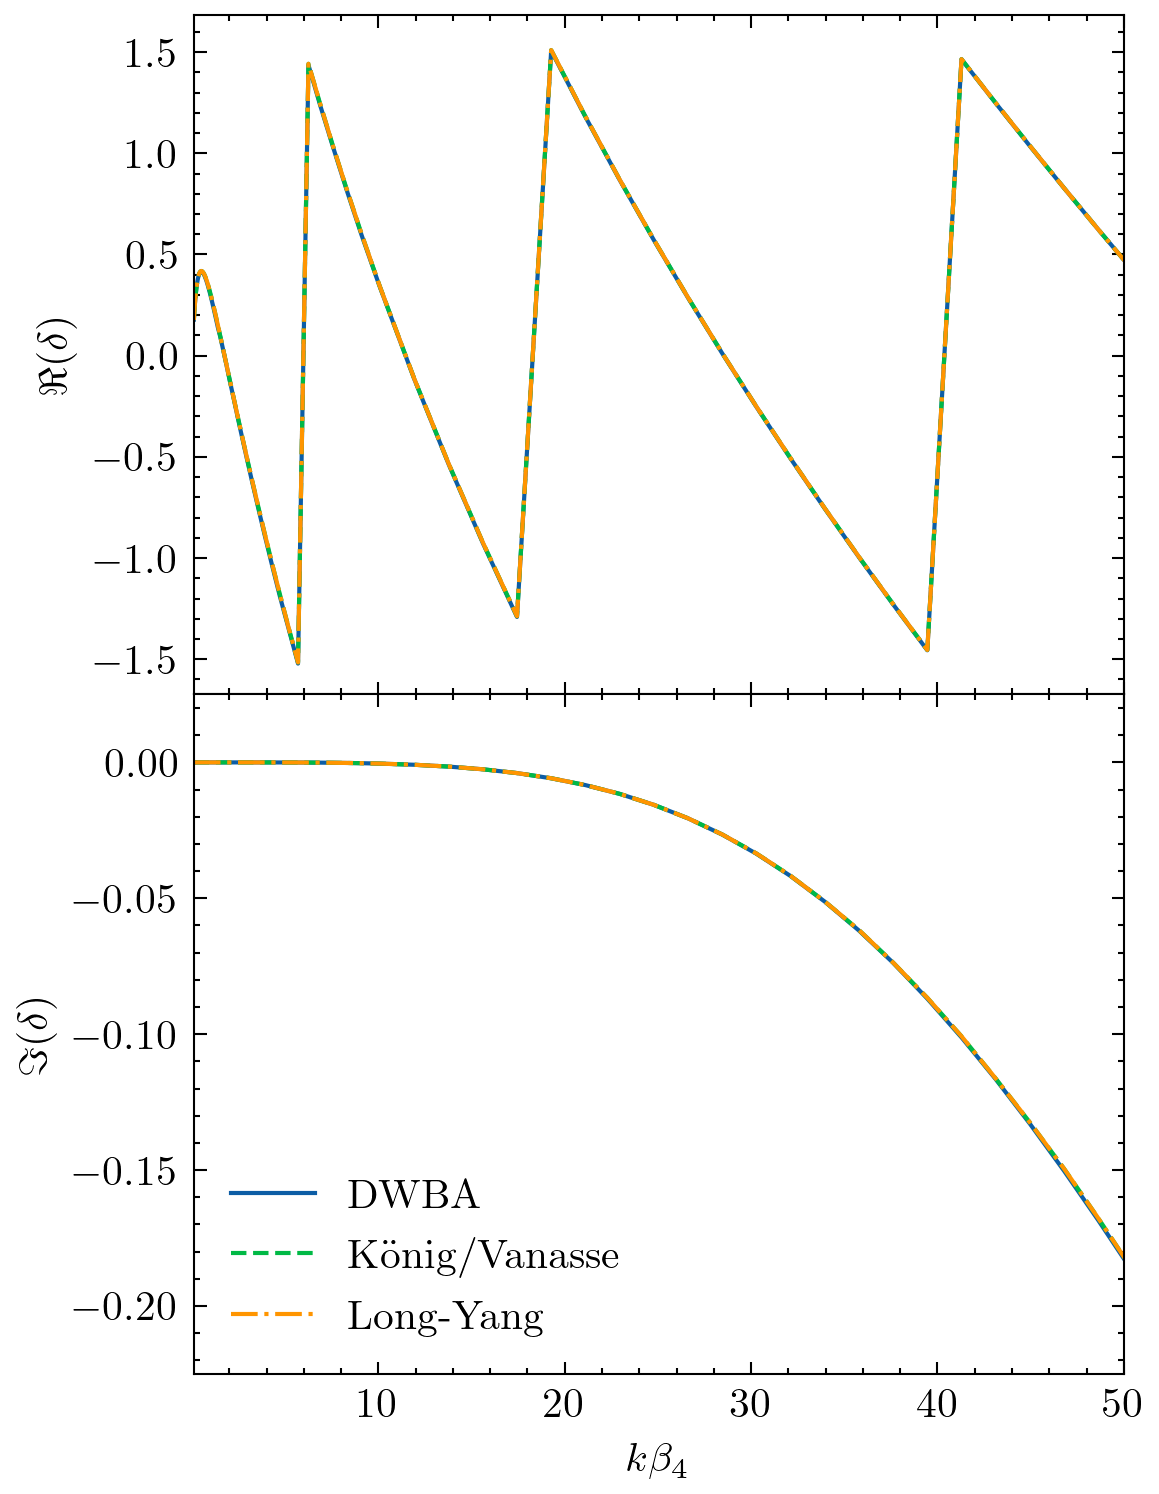

In [17]:
fig, ax = plt.subplots(2, 1, figsize=(4, 6), dpi=300)
fig.patch.set_facecolor('white')

ax[0].plot(const.BETA4*ks, deltas_dwba.real, color='C0')
ax[1].plot(const.BETA4*ks, deltas_dwba.imag, color='C0', label=r'DWBA')

ax[0].plot(const.BETA4*ks, deltas_k.real, color='C1', linestyle='--')
ax[1].plot(const.BETA4*ks, deltas_k.imag, color='C1', linestyle='--', label=r'König/Vanasse')

ax[0].plot(const.BETA4*ks, deltas_ly.real, color='C2', linestyle='-.')
ax[1].plot(const.BETA4*ks, deltas_ly.imag, color='C2', linestyle='-.', label=r'Long-Yang')

ax[1].legend()
ax[0].set_xlim([0.1, 50])
ax[1].set_xlim([0.1, 50])
ax[1].set_ylim([-0.225, 0.025])
ax[0].set_ylabel(r'$\Re{(\delta)}$')
ax[0].set_xticklabels([])
# ax[1].set_yticklabels(['-0.25', None, '-0.15', None, '-0.05'])
# ax[0].set_xlabel(r'$k\beta_4$')
ax[1].set_xlabel(r'$k\beta_4$')
ax[1].set_ylabel(r'$\Im{(\delta)}$')
plt.subplots_adjust(hspace=0);

# plt.savefig('figures/nlo_phase_shift_comparison.pdf')

In [30]:
dwba.shape, nlo_rg_flow.shape

((98, 80), (79, 3))

In [27]:
dwba[:, 0].real*const.BETA4

array([1.00000000e-01, 1.09854114e-01, 1.20679264e-01, 1.32571137e-01,
       1.45634848e-01, 1.59985872e-01, 1.75751062e-01, 1.93069773e-01,
       2.12095089e-01, 2.32995181e-01, 2.55954792e-01, 2.81176870e-01,
       3.08884360e-01, 3.39322177e-01, 3.72759372e-01, 4.09491506e-01,
       4.49843267e-01, 4.94171336e-01, 5.42867544e-01, 5.96362332e-01,
       6.55128557e-01, 7.19685673e-01, 7.90604321e-01, 8.68511374e-01,
       9.54095476e-01, 1.04811313e+00, 1.15139540e+00, 1.26485522e+00,
       1.38949549e+00, 1.52641797e+00, 1.67683294e+00, 1.84206997e+00,
       2.02358965e+00, 2.22299648e+00, 2.44205309e+00, 2.68269580e+00,
       2.94705170e+00, 3.23745754e+00, 3.55648031e+00, 3.90693994e+00,
       4.29193426e+00, 4.71486636e+00, 5.17947468e+00, 5.68986603e+00,
       6.25055193e+00, 6.86648845e+00, 7.54312006e+00, 8.28642773e+00,
       9.10298178e+00, 1.00000000e+01, 1.01000000e+01, 1.19346939e+01,
       1.37693878e+01, 1.56040816e+01, 1.74387755e+01, 1.92734694e+01,
      

In [9]:
pert_k = np.array(
    [sys.kcotd_gen_pert1([k], c0, k**2/(2*const.MU)*c2) for k in ks]
).flatten()

In [10]:
pert_ly = np.array(
    [sys.kcotd_gen_pert1a([k], c0, k**2/(2*const.MU)*c2) for k in ks]
).flatten()

In [11]:
v0 = sys.v_tilde + sys.interaction.counterterm.gen(c0, 0)
v1 = sys.interaction.counterterm.gen(0, c2)
ts = np.array(
    [mu2.scatter.t_amplitudes(k, v0, k**2/(2*const.MU)*v1, sys.q, sys.wq, sys.qmax, 2*sys.mu) for k in ks]
)

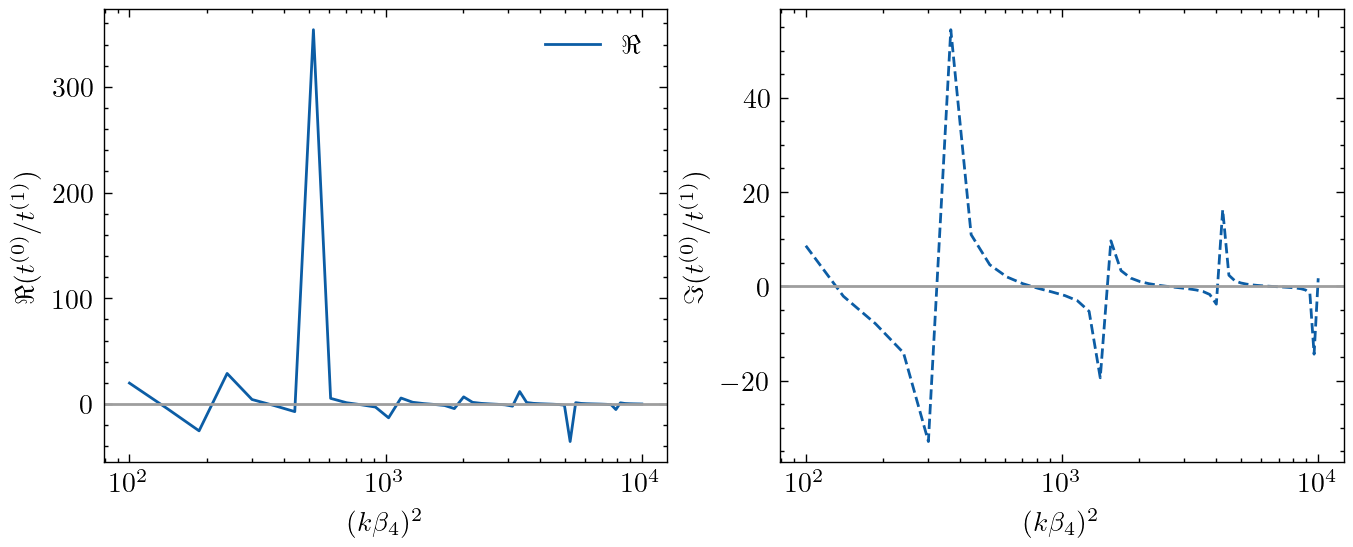

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3), dpi=200)
fig.patch.set_facecolor('white')

ax[0].plot((ks*const.BETA4)**2, ts[:, 0].real/ts[:, 1].real, label=r'$\Re$')
ax[0].axhline(0, color='C6')

ax[1].plot((ks*const.BETA4)**2, ts[:, 0].imag/ts[:, 1].imag, linestyle='--')
ax[1].axhline(0, color='C6')

ax[0].set_ylabel(r'$\Re(t^{(0)}/t^{(1)})$')
ax[1].set_ylabel(r'$\Im(t^{(0)}/t^{(1)})$')
ax[0].legend()
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_xlabel(r'$(k\beta_4)^2$')
ax[1].set_xlabel(r'$(k\beta_4)^2$');

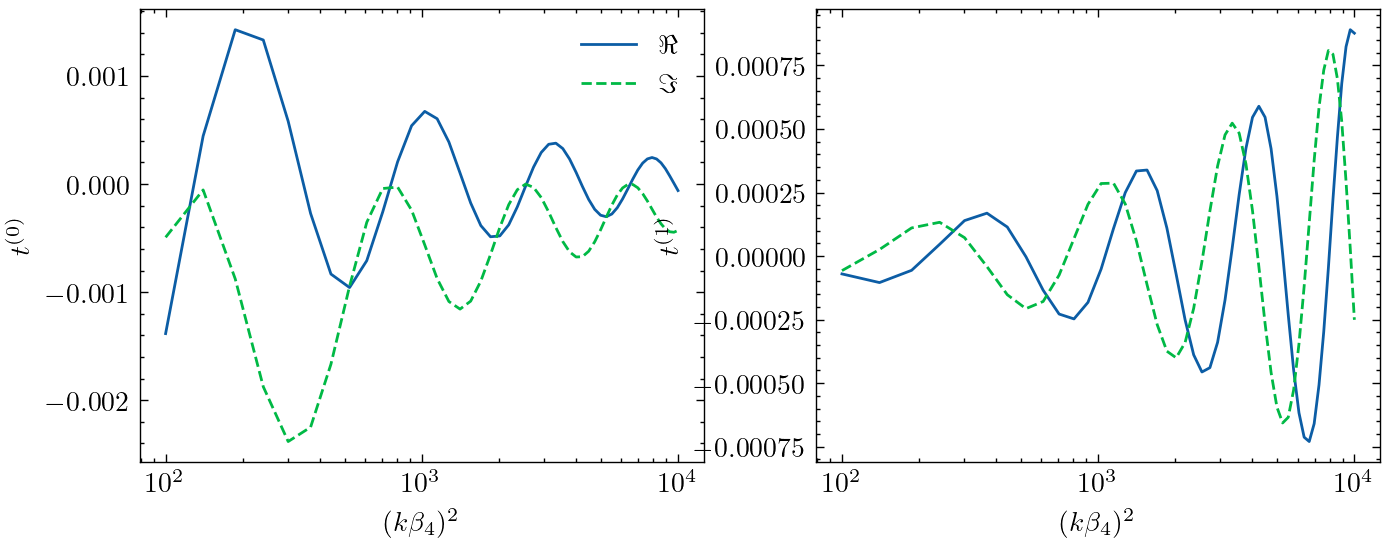

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3), dpi=200)
fig.patch.set_facecolor('white')

ax[0].plot((ks*const.BETA4)**2, ts[:, 0].real, label=r'$\Re$')
ax[0].plot((ks*const.BETA4)**2, ts[:, 0].imag, linestyle='--', label=r'$\Im$')

ax[1].plot((ks*const.BETA4)**2, ts[:, 1].real)
ax[1].plot((ks*const.BETA4)**2, ts[:, 1].imag, linestyle='--')

ax[0].set_ylabel(r'$t^{(0)}$')
ax[1].set_ylabel(r'$t^{(1)}$')
ax[0].legend()
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_xlabel(r'$(k\beta_4)^2$')
ax[1].set_xlabel(r'$(k\beta_4)^2$');

In [108]:
factor = -sys.mu * np.pi * ks
ts *= factor[:, np.newaxis]

In [109]:
# delta0 = np.log(2j/factor*ts[:, 0] + 1)
delta0 = np.arctan(ts[:, 0] / (1 + 1j*ts[:, 0]))

In [110]:
delta1 = ts[:, 1] * np.exp(-2j * delta0)

In [111]:
# delta1_odell = np.log(2j * (ts[:, 0] + ts[:, 1]) + 1)
delta1_odell = np.arctan(np.sum(ts, axis=1) / (1 + 1j*np.sum(ts, axis=1)))

In [114]:
t = np.sum(ts / factor[:, np.newaxis], axis=1).flatten()
kcd = -2*t.real / (2*sys.mu*np.pi*(t.real**2 + t.imag**2))
delta_old = np.arctan(ks/kcd)

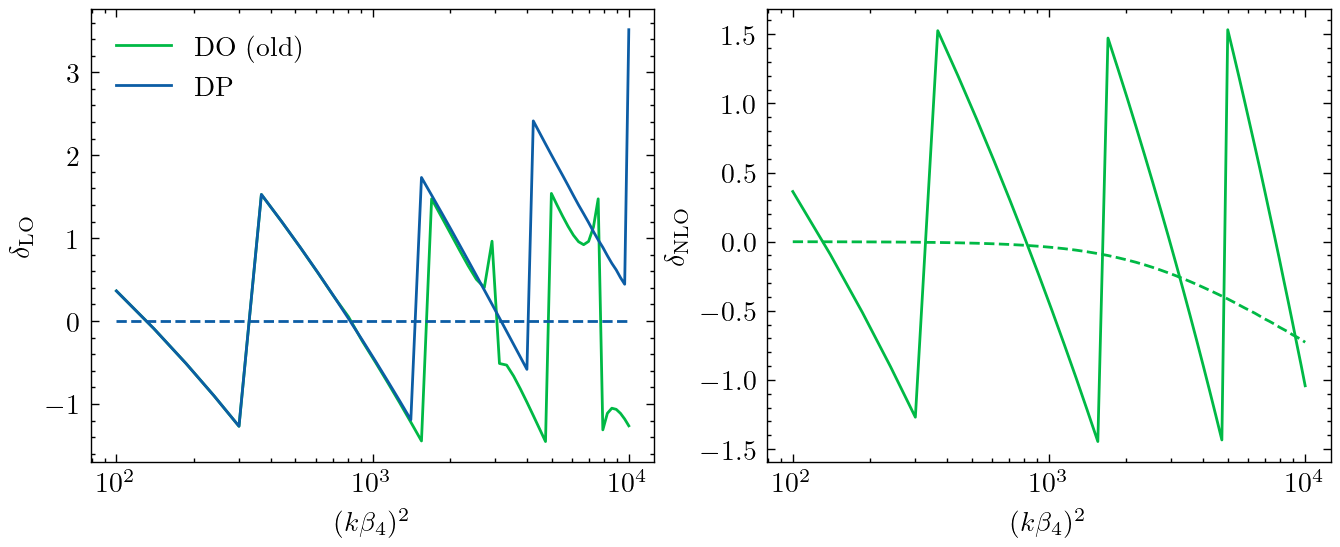

In [125]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3), dpi=200)
fig.patch.set_facecolor('white')

ax[0].plot((ks*const.BETA4)**2, delta0.real, color='C0', label='DP')
ax[0].plot((ks*const.BETA4)**2, delta0.imag, linestyle='--', color='C0')
ax[0].plot((ks*const.BETA4)**2, delta_old, color='C1', label='DO (old)')

# ax[1].plot((ks*const.BETA4)**2, (delta1 + delta0).real % np.pi)
# ax[1].plot((ks*const.BETA4)**2, (delta1 + delta0).imag % np.pi, linestyle='--')

ax[1].plot((ks*const.BETA4)**2, (delta1 + delta0).real, color='C0')
ax[1].plot((ks*const.BETA4)**2, (delta1 + delta0).imag, linestyle='--', color='C0')

ax[1].plot((ks*const.BETA4)**2, delta1_odell.real, color='C1')
ax[1].plot((ks*const.BETA4)**2, delta1_odell.imag, linestyle='--', color='C1')

ax[0].set_xlabel(r'$(k\beta_4)^2$')
ax[0].set_ylabel(r'$\delta_{\rm LO}$')

ax[1].set_xlabel(r'$(k\beta_4)^2$')
ax[1].set_ylabel(r'$\delta_{\rm NLO}$')

ax[0].legend()
ax[0].set_xscale('log')
ax[1].set_xscale('log');

In [136]:
mm = np.loadtxt('phase_shifts_mott_massey_wide_dense_coord_ir_corrected.txt')
lo = np.loadtxt('phase_shifts_lo_wide_dense_hp_n_14_coord_ir_corrected.txt')

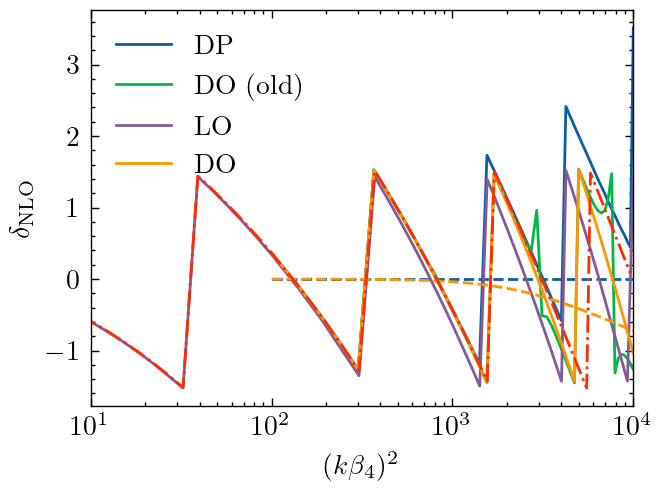

In [140]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.plot((ks*const.BETA4)**2, (delta1 + delta0).real, color='C0', label='DP')
ax.plot((ks*const.BETA4)**2, (delta1 + delta0).imag, linestyle='--', color='C0')
ax.plot((ks*const.BETA4)**2, delta_old, color='C1', label='DO (old)')
ax.plot((lo[:, 0]*const.BETA4)**2, lo[:, -20], color='C4', label='LO')

ax.plot((ks*const.BETA4)**2, delta1_odell.real, color='C2', label='DO')
ax.plot((ks*const.BETA4)**2, delta1_odell.imag, linestyle='--', color='C2')

ax.plot((mm[:, 0]*const.BETA4)**2, mm[:, 1], linestyle='-.', color='C3')

ax.set_xlabel(r'$(k\beta_4)^2$')
ax.set_ylabel(r'$\delta_{\rm NLO}$')

ax.set_xlim([1e1, 1e4])
ax.legend()
ax.set_xscale('log')
ax.set_xscale('log');

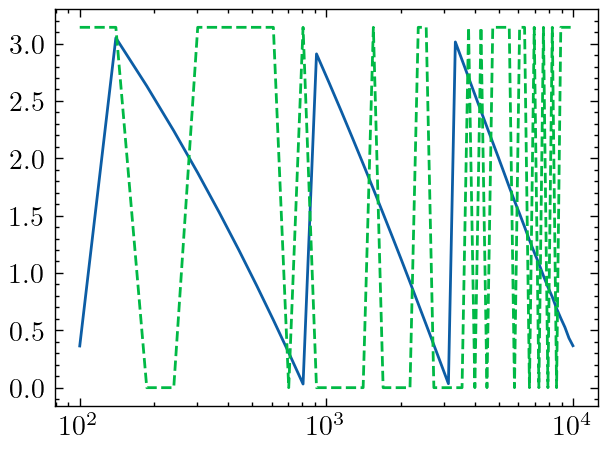

In [90]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.plot((ks*const.BETA4)**2, (delta0 + delta1).real % np.pi)
ax.plot((ks*const.BETA4)**2, (delta0 + delta1).imag % np.pi, linestyle='--')

ax.set_xscale('log');

In [91]:
deltas_k = np.arctan(ks/pert_k)
deltas_ly = np.arctan(ks/pert_ly)

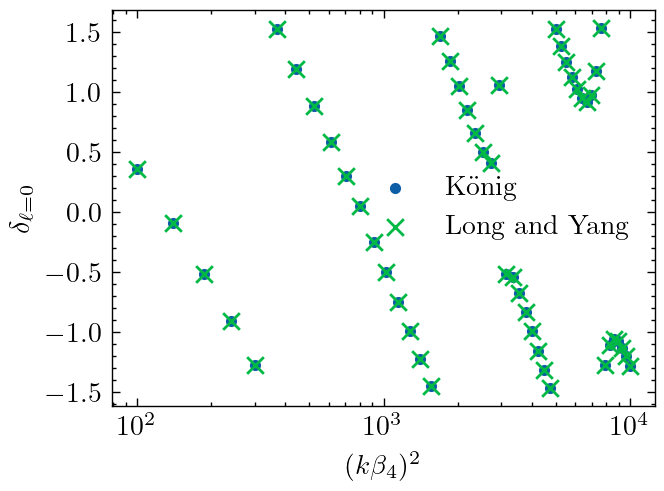

In [92]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.scatter((ks*const.BETA4)**2, deltas_k, marker='.', label=r'König')
ax.scatter((ks*const.BETA4)**2, deltas_ly, marker='x', label=r'Long and Yang')
ax.set_xscale('log')

ax.legend()
ax.set_xlabel(r'$(k\beta_4)^2$')
ax.set_ylabel(r'$\delta_{\ell=0}$');

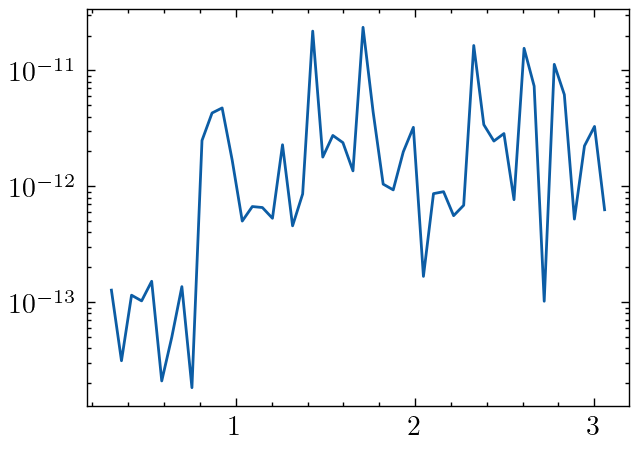

In [51]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.plot(ks, np.abs((deltas_k - deltas_ly) / deltas_k))
ax.set_yscale('log');

Yep, looks pretty good. Or at least not bad.

## Reproducing LO

If I turn off the NLO counterterm, do I recover the LO result?

In [11]:
kcd_lo = sys.kcotd_gen_fast(ks, c0, 0)
kcd_lo_1 = np.array([
    sys.kcotd_gen_pert1a([k], c0, 0.0) for k in ks
]).flatten()

In [12]:
np.abs((kcd_lo - kcd_lo_1) / kcd_lo)

array([3.23458100e-13, 8.63486944e-14, 6.09411569e-13, 2.31466194e-14,
       4.76670442e-13, 5.78032262e-13, 8.28398441e-13, 1.55518545e-12,
       4.69563939e-13, 3.06643022e-12, 3.17266813e-13, 1.92779343e-12,
       1.11412107e-12, 4.97369867e-12, 3.57733961e-12, 3.40458636e-13,
       2.89123906e-12, 2.80462362e-12, 4.30890388e-13, 1.60079316e-11,
       2.67538682e-09, 1.02286781e-13, 2.30176062e-12, 2.11245370e-12,
       1.51948158e-11, 2.79132321e-11, 2.51732255e-11, 7.19899391e-13,
       1.12287979e-12, 1.04071574e-11, 1.47566193e-11, 1.41091679e-11,
       5.62579725e-12, 4.06938836e-12, 4.79787982e-13, 4.74680403e-12,
       6.70814543e-12, 1.67633028e-11, 1.81345042e-11, 1.13089732e-11,
       6.18675565e-11, 1.42077763e-11, 1.38226425e-12, 2.47334577e-12,
       1.90901386e-12, 2.30979573e-12, 3.27791106e-12, 3.20128286e-11,
       1.49378936e-09, 2.95697581e-12])

Absolutely yes.

/var/folders/_z/4zb077j96tz1_kb2vklbxydr0000gn/T/ipykernel_78832/958412751.py:5: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log');


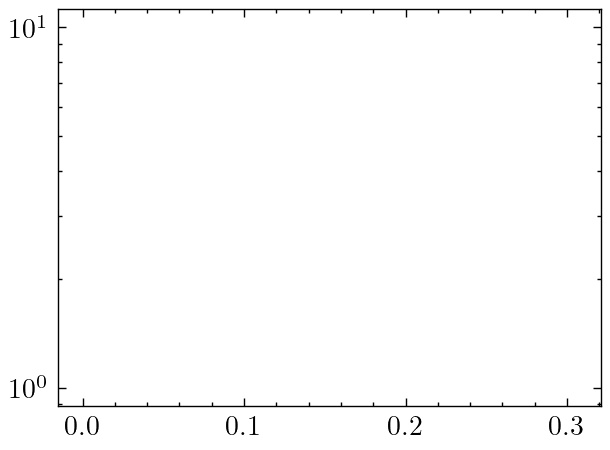

In [10]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.plot(ks, np.abs((kcd_lo - kcd_lo_1) / kcd_lo))
ax.set_yscale('log');

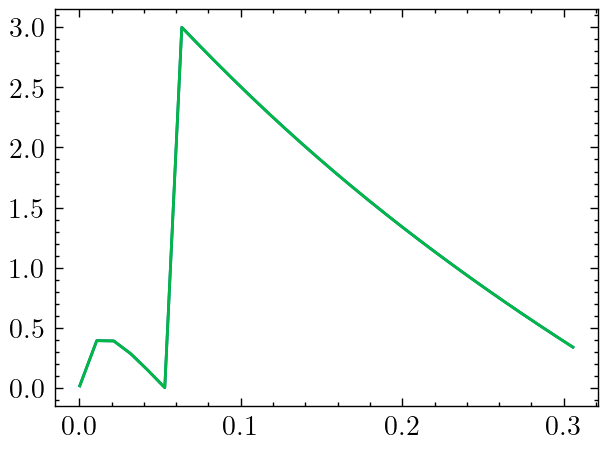

In [11]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.plot(ks, (np.arctan(ks/kcd_lo) + np.pi) % np.pi)
ax.plot(ks, (np.arctan(ks/kcd_lo_1) + np.pi) % np.pi);